# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [263]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [242]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
log_LoanAmount         0
Combined_income        0
log_combined_income    0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df[df['Credit_History']==1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [5]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [6]:
df.groupby('Gender').count()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Female,112,111,109,112,104,112,112,109,109,101,112,112
Male,489,487,477,489,465,489,489,470,478,451,489,489


In [7]:
df[df['Loan_Status']=="Y"].groupby('Gender').count()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,,,,,,,,,,,,
Female,75,74,73,75,69,75,75,73,73,65,75,75
Male,339,337,332,339,322,339,339,330,333,313,339,339


In [8]:
df.groupby('Gender').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5446.460123,1742.932352,149.265957,339.665272,0.847007


In [10]:
df.groupby("Married").mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Married,,,,,
No,4970.384977,1316.558685,128.883495,351.115385,0.839196
Yes,5629.173367,1794.632965,155.750000,336.987147,0.842541


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



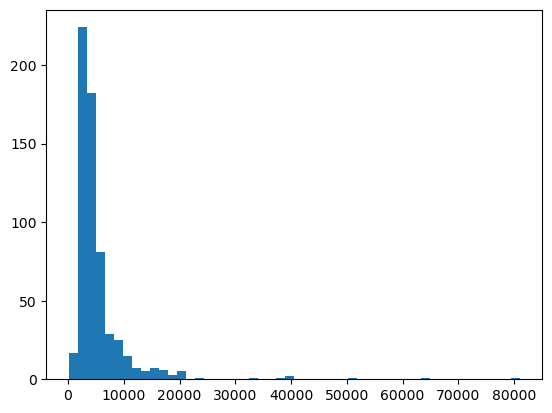

In [11]:
x = df['ApplicantIncome']

plt.hist(x, bins=50)
plt.show()


Look at box plots to understand the distributions. 

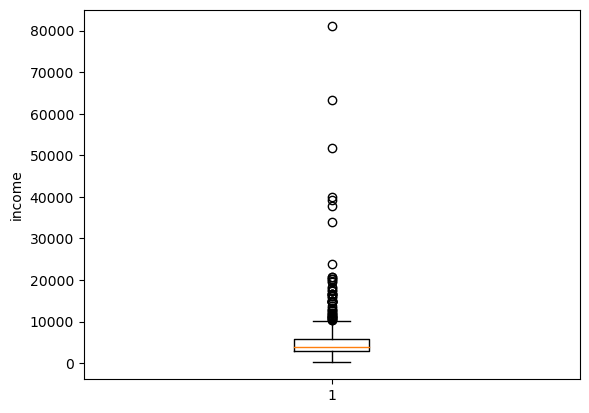

In [12]:
plt.boxplot(x)

plt.ylabel('income')
plt.show()

Look at the distribution of income segregated  by `Education`

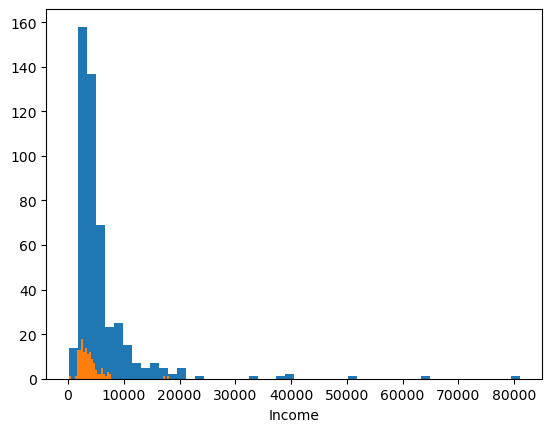

In [14]:
x1 = df[df['Education']=='Graduate']['ApplicantIncome']
x2 = df[df['Education']=='Not Graduate']['ApplicantIncome']

plt.hist(x1, bins=50)
plt.hist(x2, bins=50)
plt.xlabel("Income")
plt.show()

Look at the histogram and boxplot of LoanAmount

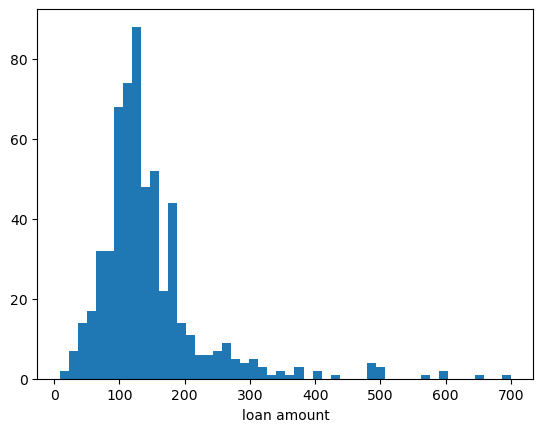

In [15]:
x_loan = df['LoanAmount']

plt.hist(x_loan,bins=50)
plt.xlabel("loan amount")
plt.show()

In [16]:
x_loan_mean = x_loan.mean()
xl2 = x_loan.fillna(x_loan_mean)

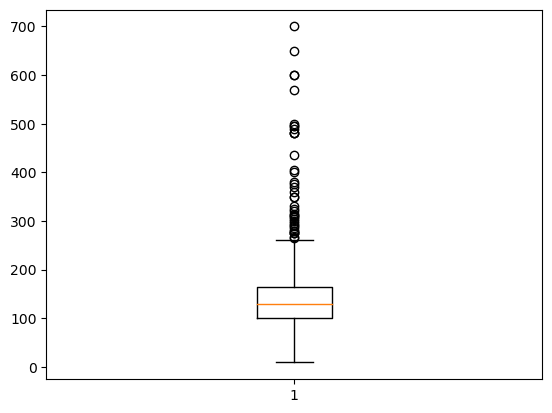

In [17]:
plt.boxplot(xl2)
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [18]:
table = pd.pivot_table(df, index=['Education', 'Loan_Status'], columns=['Self_Employed'])

table

ApplicantIncome              CoapplicantIncome  \
Self_Employed                         No          Yes                No   
Education    Loan_Status                                                  
Graduate     N               6140.707965  6807.789474       1843.380531   
             Y               5243.605072  8118.695652       1579.771449   
Not Graduate N               3489.136364  4108.571429       1269.136364   
             Y               3436.074627  7365.900000       1348.268657   

                                      Credit_History            LoanAmount  \
Self_Employed                     Yes             No       Yes          No   
Education    Loan_Status                                                     
Graduate     N            1995.000000       0.574074  0.473684  160.412844   
             Y            1518.347826       0.976471  1.000000  144.293680   
Not Graduate N            1307.571429       0.452381  0.666667  118.923077   
             Y             620.800000       0.982759  1.000000  113.615385   

                                     Loan_Amount_Term              
Self_Employed                    Yes               No         Yes  
Education    Loan_Status                                           
Graduate     N            162.333333       355.090909  328.421053  
             Y            190.386364       343.296703  341.866667  
Not Graduate N            141.000000       324.292683  334.285714  
             Y            130.200000       335.076923  326.666667

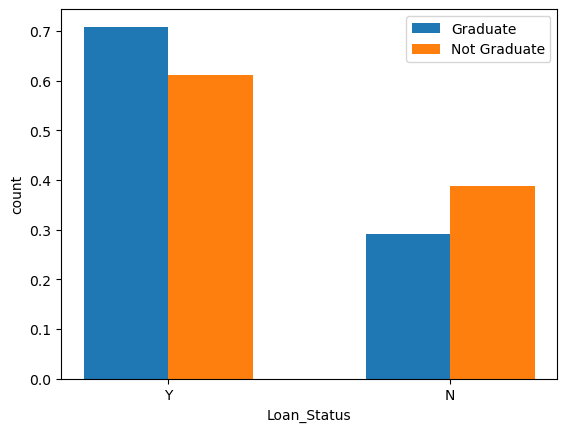

In [305]:
x = df['Loan_Status'].unique()
y1 = df[df['Education']=='Graduate']['Loan_Status'].value_counts(normalize=True)
y2 = df[df['Education']=='Not Graduate']['Loan_Status'].value_counts(normalize=True)

ind = np.arange(len(x))

fig, ax = plt.subplots()

ax.bar(ind-0.15, y1, width = 0.3, label='Graduate')
ax.bar(ind+0.15, y2, width = 0.3, label='Not Graduate')
ax.legend()

plt.xlabel('Loan_Status')
plt.ylabel('count')
plt.xticks(ind, x)
plt.show()

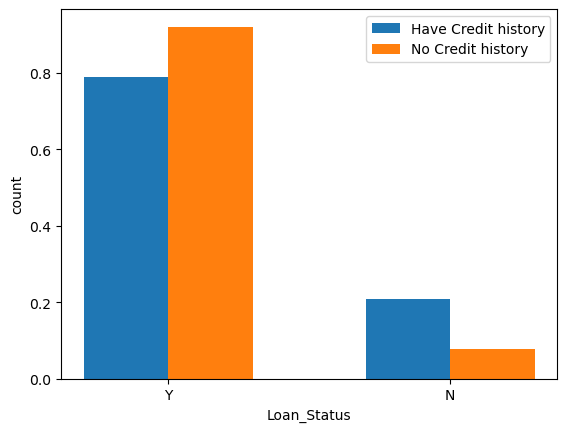

In [304]:
x = df['Loan_Status'].unique()
y1 = df[df['Credit_History']==1]['Loan_Status'].value_counts(normalize=True)
y2 = df[df['Credit_History']==0]['Loan_Status'].value_counts(normalize=True)

ind = np.arange(len(x))

fig, ax = plt.subplots()

ax.bar(ind-0.15, y1, width = 0.3, label='Have Credit history')
ax.bar(ind+0.15, y2, width = 0.3, label='No Credit history')
ax.legend()

plt.xlabel('Loan_Status')
plt.ylabel('count')
plt.xticks(ind, x)
plt.show()

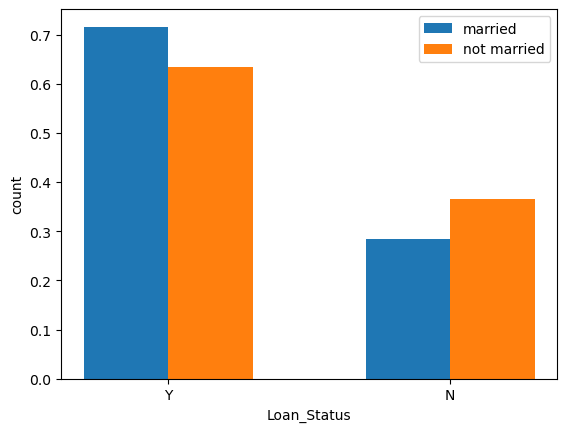

In [303]:
x = df['Loan_Status'].unique()
y1 = df[df['Married']=='Yes']['Loan_Status'].value_counts(normalize=True)
y2 = df[df['Married']=='No']['Loan_Status'].value_counts(normalize=True)

ind = np.arange(len(x))

fig, ax = plt.subplots()

ax.bar(ind-0.15, y1, width = 0.3, label='married')
ax.bar(ind+0.15, y2, width = 0.3, label='not married')
ax.legend()

plt.xlabel('Loan_Status')
plt.ylabel('count')
plt.xticks(ind, x)
plt.show()

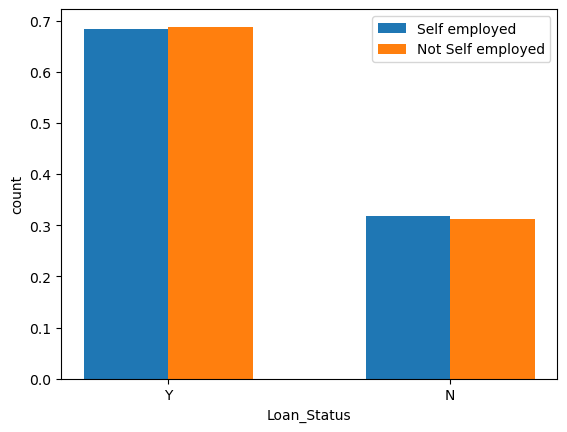

In [302]:
x = df['Loan_Status'].unique()
y1 = df[df['Self_Employed']=='Yes']['Loan_Status'].value_counts(normalize=True)
y2 = df[df['Self_Employed']=='No']['Loan_Status'].value_counts(normalize=True)

ind = np.arange(len(x))

fig, ax = plt.subplots()

ax.bar(ind-0.15, y1, width = 0.3, label='Self employed')
ax.bar(ind+0.15, y2, width = 0.3, label='Not Self employed')
ax.legend()

plt.xlabel('Loan_Status')
plt.ylabel('count')
plt.xticks(ind, x)
plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [23]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [295]:
df[df['Gender'].isnull()]

#fill missing values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [296]:
df[df['Married'].isnull()]

#Set Married NaN to No
df['Married'].fillna('No', inplace=True)

In [297]:
df[df['LoanAmount'].isnull()]

#Set loan amount NaN to mean of loan amount
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [298]:
df[df['Dependents'].isnull()]

#set Dependents NaN to 0
df['Dependents'].fillna(0, inplace=True)

In [299]:
#Set self employed NaN to No
df['Self_Employed'].fillna('No', inplace=True)

In [300]:
df[df['Loan_Amount_Term'].isnull()]

#fill NaN with meadian of loan amount term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [301]:
df[df['Credit_History'].isnull()]

#going to fill those with NaN Credit History to 0
df["Credit_History"].fillna(1, inplace=True)

In [80]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
log_LoanAmount         0
Combined_income        0
log_combined_income    0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [32]:
df['log_LoanAmount'] = np.log(df['LoanAmount'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760


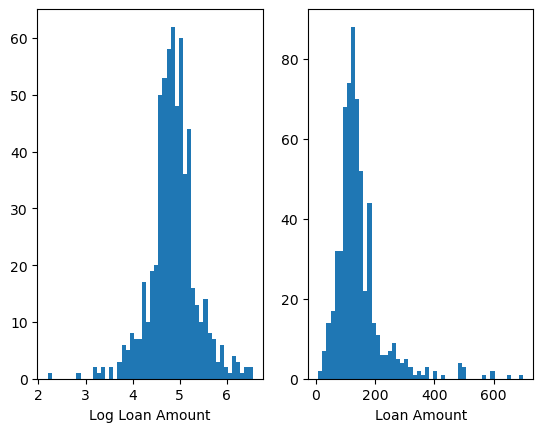

In [33]:
x1 = df['log_LoanAmount']
x2 = df['LoanAmount']

fig, axs = plt.subplots(1,2)
axs[0].hist(x1, bins=50)
axs[1].hist(x2, bins=50)
axs[0].set(xlabel='Log Loan Amount')
axs[1].set(xlabel='Loan Amount')
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [34]:
#combining income
df['Combined_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['log_combined_income'] = np.log(df['Combined_income'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,Combined_income,log_combined_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


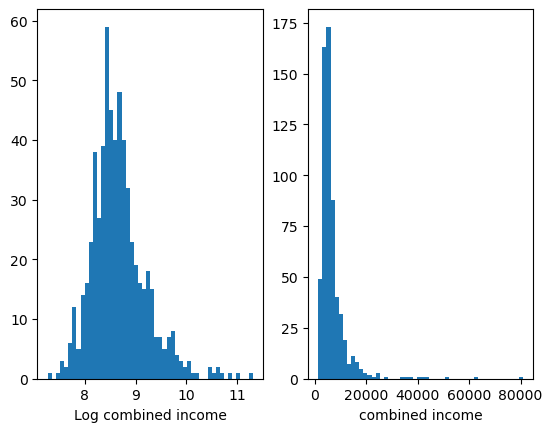

In [35]:
x3 = df['log_combined_income']
x4 = df['Combined_income']

fig, axs = plt.subplots(1,2)
axs[0].hist(x3, bins=50)
axs[1].hist(x4, bins=50)
axs[0].set(xlabel='Log combined income')
axs[1].set(xlabel='combined income')
plt.show()

In [36]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_LoanAmount,Combined_income,log_combined_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.773616,4.862066,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,64.428629,0.418832,0.496575,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,4.859812,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000,11.302204


## 4. Building a Predictive Model

In [81]:
#filter out some columns that are uncessesary for predictions
df_filtered = df.drop('Loan_ID', axis=1)

In [84]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    object 
 1   Married              614 non-null    object 
 2   Dependents           614 non-null    object 
 3   Education            614 non-null    object 
 4   Self_Employed        614 non-null    object 
 5   ApplicantIncome      614 non-null    int64  
 6   CoapplicantIncome    614 non-null    float64
 7   LoanAmount           614 non-null    float64
 8   Loan_Amount_Term     614 non-null    float64
 9   Credit_History       614 non-null    float64
 10  Property_Area        614 non-null    object 
 11  Loan_Status          614 non-null    object 
 12  log_LoanAmount       614 non-null    float64
 13  Combined_income      614 non-null    float64
 14  log_combined_income  614 non-null    float64
dtypes: float64(7), int64(1), object(7)
memor

In [199]:
#make dummy variables for the categorical features
df_filtered['Credit_History'] = df_filtered['Credit_History'].astype('str')
target_var = df_filtered['Loan_Status']
df_encoded = pd.get_dummies(df_filtered.drop('Loan_Status', axis=1))
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,log_LoanAmount,Combined_income,log_combined_income,Gender_Female,Gender_Male,Married_No,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,4.986426,5849.0,8.674026,0,1,1,...,0,0,1,0,1,0,1,0,0,1
1,4583,1508.0,128.000000,360.0,4.852030,6091.0,8.714568,0,1,0,...,0,0,1,0,1,0,1,1,0,0
2,3000,0.0,66.000000,360.0,4.189655,3000.0,8.006368,0,1,0,...,0,0,1,0,0,1,1,0,0,1
3,2583,2358.0,120.000000,360.0,4.787492,4941.0,8.505323,0,1,0,...,0,0,0,1,1,0,1,0,0,1
4,6000,0.0,141.000000,360.0,4.948760,6000.0,8.699515,0,1,1,...,0,0,1,0,1,0,1,0,0,1


In [198]:
df_encoded.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_LoanAmount,Combined_income,log_combined_income,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.0,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,1.0,4.862066,7024.705081,8.669414,0.182410,0.817590,...,0.166124,0.164495,0.083062,0.781759,0.218241,0.866450,0.133550,0.291531,0.379479,0.328990
std,6109.041673,2926.248369,84.037468,64.428629,0.0,0.496575,6458.663872,0.545102,0.386497,0.386497,...,0.372495,0.371027,0.276201,0.413389,0.413389,0.340446,0.340446,0.454838,0.485653,0.470229
min,150.000000,0.000000,9.000000,12.000000,1.0,2.197225,1442.000000,7.273786,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.0,4.607658,4166.000000,8.334712,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.0,4.859812,5416.500000,8.597205,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.0,5.104426,7521.750000,8.925549,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.0,6.551080,81000.000000,11.302204,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
#Split data into train and test
from sklearn.model_selection import train_test_split

x_data = df_encoded
y_data = target_var

print(x_data.shape, y_data.shape)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 25) (614,)
(491, 25) (123, 25) (491,) (123,)


In [141]:
#implementing logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [133]:
#checking initial prediction accuracy for training data
y_train_pred = model.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.7780040733197556


In [134]:
#Checking initial prediction accuracy for testing data
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7398373983739838


In [135]:
#Scaling the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_data = x_data.select_dtypes(exclude=['uint8'])
x_data[num_data.columns] = scaler.fit_transform(num_data)

x_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,log_LoanAmount,Combined_income,log_combined_income,Gender_Female,Gender_Male,Married_No,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.072991,-0.554487,0.000000,0.273231,0.250640,-0.182184,0.008468,0,1,1,...,0,1,0,1,0,0,1,0,0,1
1,-0.134412,-0.038732,-0.219273,0.273231,-0.020226,-0.144684,0.082903,0,1,0,...,0,1,0,1,0,0,1,1,0,0
2,-0.393747,-0.554487,-0.957641,0.273231,-1.355202,-0.623656,-1.217363,0,1,0,...,0,1,0,0,1,0,1,0,0,1
3,-0.462062,0.251980,-0.314547,0.273231,-0.150299,-0.322885,-0.301273,0,1,0,...,0,0,1,1,0,0,1,0,0,1
4,0.097728,-0.554487,-0.064454,0.273231,0.174727,-0.158785,0.055266,0,1,1,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.410130,-0.554487,-0.898095,0.273231,-1.208025,-0.639152,-1.279607,1,0,1,...,0,1,0,1,0,0,1,1,0,0
610,-0.212557,-0.554487,-1.267279,-2.522836,-2.364484,-0.452274,-0.641153,0,1,0,...,1,1,0,1,0,0,1,1,0,0
611,0.437174,-0.472404,1.269371,0.273231,1.353011,0.199475,0.653699,0,1,0,...,0,1,0,1,0,0,1,0,0,1
612,0.357064,-0.554487,0.483367,0.273231,0.743783,0.086512,0.485168,0,1,0,...,0,1,0,1,0,0,1,0,0,1


In [148]:
#testing model
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

(491, 25) (123, 25) (491,) (123,)
0.7718940936863544
0.7642276422764228


In [246]:
#look at the confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test, y_pred)))

Confusion Matrix : 
[[16 25]
 [17 65]]


In [188]:
to_drop = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Combined_income']
x_data2 = x_data.drop(to_drop, axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_data2, y_data, test_size=0.2)

Try paramater grid search to improve the results

In [189]:
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l2', 'l1'], 
          'solver':['lbfgs', 'liblinear'], 
          'fit_intercept': [True, False], 
          'C': [0.001, 0.009, 0.01, 0.1, 1, 10, 100]}
          
grid_src = GridSearchCV(model, param_grid=params)

grid_src.fit(X_train, y_train)
print(grid_src.best_params_)
print(grid_src.best_score_)

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
0.7699443413729128


C:\Users\phini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\phini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\phini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\phini\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

In [194]:
model_grid = LogisticRegression(**grid_src.best_params_)

model_grid.fit(X_train, y_train)

y_train_pred = model_grid.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

y_pred = model_grid.predict(X_test)
print(accuracy_score(y_test, y_pred))

import pickle
with open('Regression_model.txt', 'wb') as fh:
    pickle.dump(model_grid, fh)

0.769857433808554
0.7723577235772358


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [277]:
df2 = df.drop('Loan_ID', axis=1)
df2['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [310]:
#Remaking pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

x_data = df2.drop('Loan_Status', axis=1)
y_data = df2.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

#Processing null values and applying scaling
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), 
                              ('scaling', StandardScaler())])

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])

preprocessing = ColumnTransformer([('numeric', numeric_transform, numeric_features), 
                                   ('categorical', categorical_transform, categorical_features)])

pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                          ('classification', LogisticRegression())])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print('Confusion Matrix : \n' + str(confusion_matrix(y_test, y_pred)))
print(accuracy_score(y_test, y_pred))

Confusion Matrix : 
[[13 15]
 [ 2 93]]
0.8617886178861789


In [312]:
with open('Regression_pipeline.pickle', 'wb') as fh:
    pickle.dump(pipeline, fh)

In [282]:
from sklearn import set_config
set_config(display='diagram')

pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classification', LogisticRegression())])

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [314]:
pickle_off = open('Regression_pipeline.pickle', 'rb')
model = pickle.load(pickle_off)
model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area'])])),
                ('classification', LogisticRegression())])

In [315]:
from flask import Flask, jsonify, request
from flask_restful import Resource, Api, reqparse

app = Flask(__name__)
api = Api(app)

import pickle
model = pickle.load(open('Regression_pipeline.pickle', 'rb'))

class Prediction(Resource):
    def post(self):
        json_data = request.get_json()
        
        df = pd.DataFrame(json_data.values(), index = json_data.keys()).transpose()
        
        res = model.predict_proba(df)
        
        if res == 'Y':
            return 'You are likely to get a loan'
        elif res == 'N':
            return 'You are not likely to get a loan'
        
api.add_resource(prediction, '/prediction')

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)